## Multisensory Memory Experiment 1 Analysis
- _forms_: first two questions plus debriefing survey
- _encode_: encoding phase for all participants
- _recog_: recognition phase for all participants

In [62]:
import pandas as pd
import numpy as numpy
import scipy.stats as stats
from glob import glob
from scipy.stats import iqr
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [63]:
def import_all_csvs(folder, skips=None):
	files = glob(folder + '/*.csv')
	master_df = pd.concat([pd.read_csv(f, skiprows=skips) for f in files ])
	return master_df

In [64]:
master = import_all_csvs('/Users/sheaduarte/Desktop/Projects/MSImemory/MS-Memory-Analysis/Memory_Data/data/interim/Exp1interim')

In [65]:
master.id.unique()
idlist = master['id'].value_counts()

In [66]:
new_sj_ids = list(range(0,len(master.id.unique())))
id_rename_dict = dict(zip(list(master.id.unique()), new_sj_ids))
master = master.replace({'id': id_rename_dict})

In [67]:
master.head(5)

,ITI,ITI_f,ITI_fDuration,ITI_ms,RT,age,animacy,audio,block,button1,...,responseOptions,responseType,rowNo,seperator,sex,stim1,stimFormat,subjectGroup,timestamp,type
0,NaN,NaN,NaN,NaN,8648,23.0,NaN,NaN,NaN,NaN,...,American Indian or Alaska Native;Asian;Black o...,dropdown,2,1.0,female,NaN,NaN,0.0,51728,form
1,NaN,NaN,NaN,NaN,8648,NaN,NaN,NaN,NaN,NaN,...,yes;no,dropdown,3,1.0,NaN,NaN,NaN,0.0,51728,form
2,700.0,0.0,0.00,700.0,4595,NaN,inanimate,motorcycleA.mp3,encoding,animate image,...,NaN,NaN,67,NaN,NaN,motorcycle_1,.png,2.0,62846,test
3,700.0,41.0,17.06,700.0,3943,NaN,animate,doorA.mp3,encoding,animate image,...,NaN,NaN,78,NaN,NaN,tiger_1,.png,2.0,67850,test
4,700.0,41.0,17.07,700.0,2264,NaN,animate,noise1.mp3,encoding,animate image,...,NaN,NaN,90,NaN,NaN,crocodile_2,.png,2.0,71184,test


In [68]:
forms = master[(master['type']=='form') | (master['stimFormat'] =='word')]
forms = forms[['id','age','sex','handedness', 'responseOptions', 'head', 'response','responseCode','stim1','button1','button2','button3','button4','button5']]

In [69]:
forms.stim1.unique()

array([nan,
       '1/10: Was the volume on your computer enabled throughout the entire first task?',
       '2/10: Did you adjust your volume at any time during the experiment?',
       '3/10: How would you describe the volume of the sounds during the first task?',
       '4/10: Did you use external speakers, in-ear headphones, over-ear headphones?',
       '5/10: How would you describe the environment in which you completed the study?',
       '6/10: Did you experience distractions during the study?',
       '7/10: How much effort did you put into the experiment?',
       '8/10: How difficult did you find task 1?',
       '9/10: How difficult did you find task 2?',
       '10/10: In the first task, did you ever experience a lag or gap between when the picture was shown and when the sound started?'],
      dtype=object)

In [70]:
forms[(forms['stim1'] == '4/10: Did you use external speakers, in-ear headphones, over-ear headphones?') & (forms['response']=='5')]

,id,age,sex,handedness,responseOptions,head,response,responseCode,stim1,button1,button2,button3,button4,button5
107,5,NaN,NaN,NaN,NaN,NaN,5,NaN,"4/10: Did you use external speakers, in-ear he...",External speakers,In-ear headphones,Over-ear headphones,Other,I did not hear sounds
107,67,NaN,NaN,NaN,NaN,NaN,5,NaN,"4/10: Did you use external speakers, in-ear he...",External speakers,In-ear headphones,Over-ear headphones,Other,I did not hear sounds


In [71]:
forms.head()

,id,age,sex,handedness,responseOptions,head,response,responseCode,stim1,button1,button2,button3,button4,button5
0,0,23.0,female,right-handed,American Indian or Alaska Native;Asian;Black o...,With which race do you identify?,Asian,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,yes;no,Do you identify as Hispanic,no,2.0,NaN,NaN,NaN,NaN,NaN,NaN
104,0,NaN,NaN,NaN,NaN,NaN,1,NaN,1/10: Was the volume on your computer enabled ...,Yes,No,NaN,NaN,NaN
105,0,NaN,NaN,NaN,NaN,NaN,2,NaN,2/10: Did you adjust your volume at any time d...,Yes,No,NaN,NaN,NaN
106,0,NaN,NaN,NaN,NaN,NaN,2,NaN,3/10: How would you describe the volume of the...,Quiet,Loud,Just right,I did not hear sounds,NaN


In [72]:
forms.id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [73]:
# excluding participants
sj = ['5','10','11','20','29','42','43','47','53','57','56','65','67','81']
forms = forms[~forms.id.isin(sj)]
forms.id.unique(), len(forms.id.unique())

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19,
        21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 58, 59, 60, 61,
        62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 68)

In [74]:
tmp = forms.query("sex == 'female'").sort_values("id")
len(tmp.id.unique())

55

In [75]:
demo = forms.query("age != 'Nan'")
demo.describe()

,id,age,responseCode
count,68.000000,68.000000,68.000000
mean,40.220588,19.823529,3.558824
std,24.021039,1.844242,1.919129
min,0.000000,18.000000,2.000000
25%,20.500000,18.000000,2.000000
50%,38.500000,20.000000,2.000000
75%,61.250000,20.250000,5.000000
max,80.000000,28.000000,7.000000


## Encode

In [76]:
encode = master[master['block']=='encoding']
encode = encode[['id','subjectGroup', 'image_shown', 'audio','button1','button2','condition','animacy','image_shown', 'response','RT']]
len(encode.id.unique())

82

In [77]:
encode = encode.replace({'animacy':{'animate':'1', 'inanimate':'2'}})

In [78]:
encode['correct'] = encode['animacy'] == encode['response']

In [79]:
encode.head()

,id,subjectGroup,image_shown,audio,button1,button2,condition,animacy,image_shown,response,RT,correct
2,0,2.0,motorcycle,motorcycleA.mp3,animate image,inanimate image,congruent,2,motorcycle,2,4595,True
3,0,2.0,tiger,doorA.mp3,animate image,inanimate image,incongruent,1,tiger,2,3943,False
4,0,2.0,crocodile,noise1.mp3,animate image,inanimate image,control,1,crocodile,2,2264,False
5,0,2.0,dog,dogA.mp3,animate image,inanimate image,congruent,1,dog,1,1321,True
6,0,2.0,bicycle,noise13.mp3,animate image,inanimate image,control,2,bicycle,1,1331,False


In [80]:
len(encode.id.unique())

82

## Recog

In [81]:
recog = master[master['block']=='recognition']
recog = recog[['id','subjectGroup', 'image_shown','button1','button2','button3','button4','condition','animacy','image_shown', 'response','RT']]

In [82]:
recog = recog.replace({'response':{'1':'congruent', '2':'incongruent', '3':'control', '4':'new'}})
recog['oldNewResp'] = recog['response']
recog['oldNew'] = recog['condition']
recog = recog.replace({'oldNew':{'congruent':'old', 'incongruent':'old', 'control':'old'}})
recog = recog.replace({'oldNewResp':{'congruent':'old', 'incongruent':'old', 'control':'old'}})
recog['recognized'] = recog['oldNew'] == recog['oldNewResp']
recog = recog.replace({'recognized':{True:'1', False:'0'}})
recog = recog.replace({'response':{'different':'incongruent', 'same':'congruent','nonsense':'control'}})
recog['correct'] = recog['condition'] == recog['response']
recog.head()

,id,subjectGroup,image_shown,button1,button2,button3,button4,condition,animacy,image_shown,response,RT,oldNewResp,oldNew,recognized,correct
44,0,2.0,bus,same,different,nonsense,new,new,inanimate,bus,new,3440,new,new,1,True
45,0,2.0,walkie,same,different,nonsense,new,new,inanimate,walkie,new,1714,new,new,1,True
46,0,2.0,butterfly,same,different,nonsense,new,new,animate,butterfly,new,3519,new,new,1,True
47,0,2.0,laptop,same,different,nonsense,new,new,inanimate,laptop,incongruent,2887,old,new,0,False
48,0,2.0,stapler,same,different,nonsense,new,incongruent,inanimate,stapler,congruent,2093,old,old,1,False


In [83]:
len(recog.id.unique())

82

## Exclusion
Criteria: 
- lower than 50% accuracy on the encoding phase
- lower than 30% accuracy on the recognition phase
- debriefing responses

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
def color_negative_red_50(val):
    color = 'red' if val <= .50 else 'white'
    return 'color: %s' % color

def color_negative_red_30(val):
    color = 'red' if val <= .30 else 'white'
    return 'color: %s' % color

def color_negative_red_70(val):
    color = 'red' if val <= .70 else 'white'
    return 'color: %s' % color

In [86]:
subjectEnc = []
accuracyEnc = []
for i in list(encode['id'].unique()):
    df = encode[encode['id']== i]
    score = accuracy_score(df['animacy'], df['response'])
    subjectEnc.append(i)
    accuracyEnc.append(score)
encAcc = pd.DataFrame()
encAcc['subject'] = subjectEnc
encAcc['accuracy'] = accuracyEnc
#display(encAcc)

In [87]:
encAcc.style.applymap(color_negative_red_50)

,subject,accuracy
0,0,0.547619
1,1,1
2,2,1
3,3,0.97619
4,4,1
5,5,0.452381
6,6,1
7,7,1
8,8,1
9,9,1


In [88]:
subjectRec = []
accuracyRec = []
for i in list(recog['id'].unique()):
    df = recog[recog['id']== i]
    score = accuracy_score(df['condition'], df['response'])
    subjectRec.append(i)
    accuracyRec.append(score)
recAcc = pd.DataFrame()
recAcc['subject'] = subjectRec
recAcc['accuracy'] = accuracyRec
#display(encAcc)

In [89]:
recAcc.style.applymap(color_negative_red_30)

,subject,accuracy
0,0,0.366667
1,1,0.483333
2,2,0.516667
3,3,0.4
4,4,0.516667
5,5,0.3
6,6,0.6
7,7,0.55
8,8,0.416667
9,9,0.366667


In [90]:
subjectRec2 = []
accuracyRec2 = []
for i in list(recog['id'].unique()):
    df = recog[recog['id']== i]
    score = accuracy_score(df['oldNew'], df['oldNewResp'])
    subjectRec2.append(i)
    accuracyRec2.append(score)
recAcc2 = pd.DataFrame()
recAcc2['subject'] = subjectRec2
recAcc2['accuracy'] = accuracyRec2
#display(encAcc)
recAcc2.style.applymap(color_negative_red_70)

,subject,accuracy
0,0,0.85
1,1,0.85
2,2,0.866667
3,3,0.833333
4,4,0.916667
5,5,0.716667
6,6,0.85
7,7,0.95
8,8,0.8
9,9,0.8


In [91]:
len(recog.id.unique())

82

In [92]:
# excluding participants
sj = ['5','10','11','20','29','42','47','50','53','57','56','65','67','81']
recog = recog[~recog.id.isin(sj)]
recog.id.unique(), len(recog.id.unique())

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19,
        21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 43, 44, 45, 46, 48, 49, 51, 52, 54, 55, 58, 59, 60, 61,
        62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 68)

### Data Exploration

In [93]:
# recognition accuracy 
recCondition = []
recAccuracy = []
for i in list(recog['condition'].unique()):
    df = recog[recog['condition']== i]
    score = accuracy_score(df['condition'], df['response'])
    recCondition.append(i)
    recAccuracy.append(score)
accByCond = pd.DataFrame()
accByCond['condition'] = recCondition
accByCond['accuracy'] = recAccuracy
display(accByCond)

,condition,accuracy
0,new,0.664216
1,incongruent,0.347689
2,control,0.209034
3,congruent,0.571429


In [94]:
onCond = []
onAcc = []
for i in list(recog['condition'].unique()):
    df = recog[recog['condition']== i]
    score = accuracy_score(df['oldNew'], df['oldNewResp'])
    onCond.append(i)
    onAcc.append(score)
onAccByCond = pd.DataFrame()
onAccByCond['condition'] = onCond
onAccByCond['accuracy'] = onAcc
display(onAccByCond)

,condition,accuracy
0,new,0.664216
1,incongruent,0.902311
2,control,0.915966
3,congruent,0.931723


## Stats
- One-way 1x4 ANOVA and accompanying Tukey's HSD post hoc tests
- Did this for both the specific context judgements and recognition judements

In [95]:
recog['recognized'] = (recog['recognized'] == '1').astype(int)
# stats_df and gRecog are the same except that  stats_df does not include the "new" condition, but I am using gRecog for stats
stats_df = recog[recog['condition'].isin(['congruent', 'incongruent', 'control'])]
stats_df = stats_df.groupby(['id','condition']).mean()
stats_df = stats_df.reset_index()

In [96]:
gRecog = recog.groupby(['id','condition']).mean()
gRecog = gRecog.reset_index()
gRecog

,id,condition,subjectGroup,RT,recognized,correct
0,0,congruent,2.0,1205.571429,0.928571,0.785714
1,0,control,2.0,1162.000000,1.000000,0.000000
2,0,incongruent,2.0,1113.642857,1.000000,0.071429
3,0,new,2.0,1745.500000,0.555556,0.555556
4,1,congruent,1.0,2088.142857,1.000000,0.428571
...,...,...,...,...,...,...
267,79,new,3.0,2285.444444,0.666667,0.666667
268,80,congruent,1.0,1943.642857,0.928571,0.500000
269,80,control,1.0,2221.928571,1.000000,0.000000
270,80,incongruent,1.0,2356.928571,1.000000,0.571429


In [97]:
gRecog.query('condition == "congruent"').describe()

,id,subjectGroup,RT,recognized,correct
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,40.117647,1.955882,2349.619748,0.931723,0.571429
std,23.993488,0.799885,2874.022821,0.084094,0.217985
min,0.000000,1.000000,694.357143,0.642857,0.071429
25%,20.500000,1.000000,1600.214286,0.910714,0.428571
50%,38.500000,2.000000,1909.607143,0.928571,0.571429
75%,61.250000,3.000000,2283.321429,1.000000,0.714286
max,80.000000,3.000000,24861.571429,1.000000,1.000000


In [98]:
pg.anova(data = gRecog, dv = 'correct', between = 'condition', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,condition,8.782,3,2.927,58.288,4.87351e-29,0.395
1,Within,13.460,268,0.050,-,-,-


In [99]:
pg.pairwise_tukey(data = gRecog, dv = 'correct', between = 'condition')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,congruent,control,0.571,0.209,0.362,0.038,two-sided,9.450,0.001000,1.612
1,congruent,incongruent,0.571,0.348,0.224,0.038,two-sided,5.834,0.001000,0.995
2,congruent,new,0.571,0.664,-0.093,0.038,two-sided,-2.420,0.074244,-0.413
3,control,incongruent,0.209,0.348,-0.139,0.038,two-sided,-3.616,0.001768,-0.617
4,control,new,0.209,0.664,-0.455,0.038,two-sided,-11.870,0.001000,-2.024
5,incongruent,new,0.348,0.664,-0.317,0.038,two-sided,-8.254,0.001000,-1.408


In [100]:
pg.anova(data = gRecog, dv = 'recognized', between = 'condition', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,condition,3.28,3,1.093,49.58,1.60195e-25,0.357
1,Within,5.91,268,0.022,-,-,-


In [101]:
pg.pairwise_tukey(data = gRecog, dv = 'recognized', between = 'condition')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,congruent,control,0.932,0.916,0.016,0.025,two-sided,0.619,0.90000,0.106
1,congruent,incongruent,0.932,0.902,0.029,0.025,two-sided,1.156,0.73943,0.197
2,congruent,new,0.932,0.664,0.268,0.025,two-sided,10.516,0.00100,1.793
3,control,incongruent,0.916,0.902,0.014,0.025,two-sided,0.537,0.90000,0.092
4,control,new,0.916,0.664,0.252,0.025,two-sided,9.897,0.00100,1.688
5,incongruent,new,0.902,0.664,0.238,0.025,two-sided,9.360,0.00100,1.596


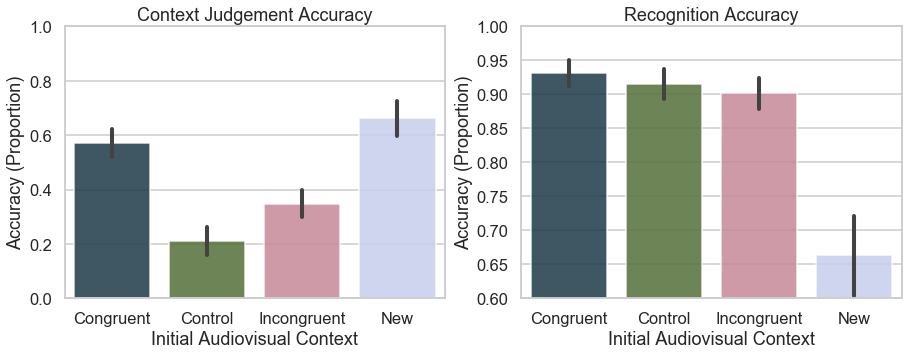

In [102]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey = False, figsize = (15, 5))
sns.barplot(data = gRecog, x ='condition', y= 'correct', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax0)
sns.barplot(data = gRecog, x ='condition', y= 'recognized', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax1)
ax0.set(ylim = (0,1),ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
ax1.set(ylim = (0.6,1), ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
ax0.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
ax1.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
ax0.set_title('Context Judgement Accuracy')
ax1.set_title('Recognition Accuracy')         
plt.show()

In [103]:
recog.groupby('response').mean()

,id,subjectGroup,RT,recognized,correct
response,,,,,
congruent,40.808664,1.935018,1905.325632,0.929242,0.392780
control,38.100340,2.096939,2300.698980,0.818027,0.338435
incongruent,41.000947,1.910985,2261.287879,0.804924,0.313447
new,39.448145,1.949572,2201.762131,0.773549,0.773549


In [104]:
congRec = recog.query("condition == 'congruent'")
recog

,id,subjectGroup,image_shown,button1,button2,button3,button4,condition,animacy,image_shown,response,RT,oldNewResp,oldNew,recognized,correct
44,0,2.0,bus,same,different,nonsense,new,new,inanimate,bus,new,3440,new,new,1,True
45,0,2.0,walkie,same,different,nonsense,new,new,inanimate,walkie,new,1714,new,new,1,True
46,0,2.0,butterfly,same,different,nonsense,new,new,animate,butterfly,new,3519,new,new,1,True
47,0,2.0,laptop,same,different,nonsense,new,new,inanimate,laptop,incongruent,2887,old,new,0,False
48,0,2.0,stapler,same,different,nonsense,new,incongruent,inanimate,stapler,congruent,2093,old,old,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,80,1.0,record_player,same,different,nonsense,new,new,inanimate,record_player,new,3333,new,new,1,True
100,80,1.0,crocodile,same,different,nonsense,new,incongruent,animate,crocodile,incongruent,1861,old,old,1,True
101,80,1.0,hammer,same,different,nonsense,new,control,inanimate,hammer,incongruent,1655,old,old,1,False
102,80,1.0,scissors,same,different,nonsense,new,congruent,inanimate,scissors,incongruent,2578,old,old,1,False


In [105]:
# just the Context Judgement Accuracy Graph
# sns.set_context('talk')
# sns.set_style('whitegrid')
# fig, (ax0) = plt.subplots(figsize = (7, 5))
# sns.barplot(data = gRecog, x ='condition', y= 'correct', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax0)
# sns.barplot(data = gRecog, x ='condition', y= 'recognized', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax1)
# ax0.set(ylim = (0,1),ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
# ax1.set(ylim = (0.6,1), ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
# ax0.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
# ax1.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
# ax0.set_title('Context Judgement Accuracy')
# ax1.set_title('Recognition Accuracy')         
# plt.show()

In [106]:
# Just the Recognition Accuracy Graph
# sns.set_context('talk')
# sns.set_style('whitegrid')
# fig, (ax1) = plt.subplots(figsize = (7, 5))
# sns.barplot(data = gRecog, x ='condition', y= 'correct', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax0)
# sns.barplot(data = gRecog, x ='condition', y= 'recognized', palette = 'cubehelix', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'], ax = ax1)
# ax0.set(ylim = (0,1),ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
# ax1.set(ylim = (0.6,1), ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
# ax0.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
# ax1.set_xticklabels(['Same', 'Nonsense', 'Different', 'New'])
# ax0.set_title('Context Judgement Accuracy')
# ax1.set_title('Recognition Accuracy')         
# plt.show()

### Effects of Animacy

In [107]:
# this daata is grouped to look at the effects of object animacy on memory
animG = recog.groupby(['animacy','id','condition']).mean()
animG = animG.reset_index()

In [108]:
animEncG = encode.groupby(['animacy','id','condition']).mean()
animEncG = animEncG.reset_index()

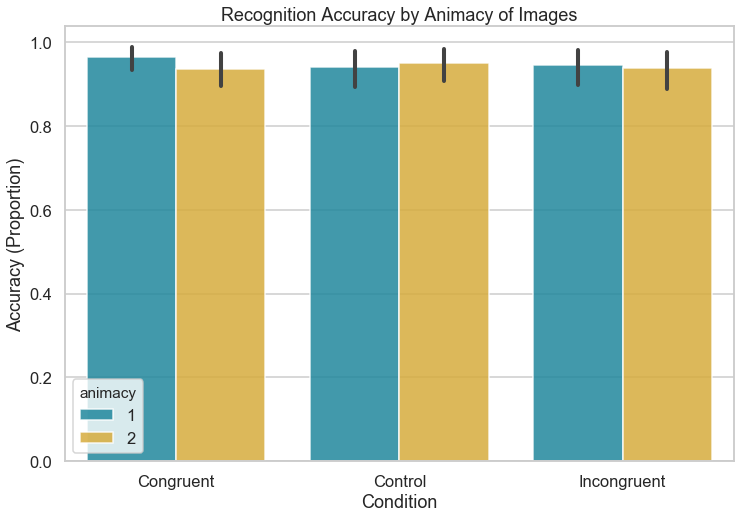

In [109]:
sns.set_context('talk')
sns.set_style('whitegrid')
animPal = ['#0C94B2','#F0B823']
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = animEncG, x ='condition', y= 'correct', hue = 'animacy', palette = animPal, alpha = 0.85)
ax.set_title('Recognition Accuracy by Animacy of Images') 
ax.set(ylabel = 'Accuracy (Proportion)', xlabel = 'Condition')
ax.set_xticklabels(['Congruent', 'Control', 'Incongruent'])
plt.show()

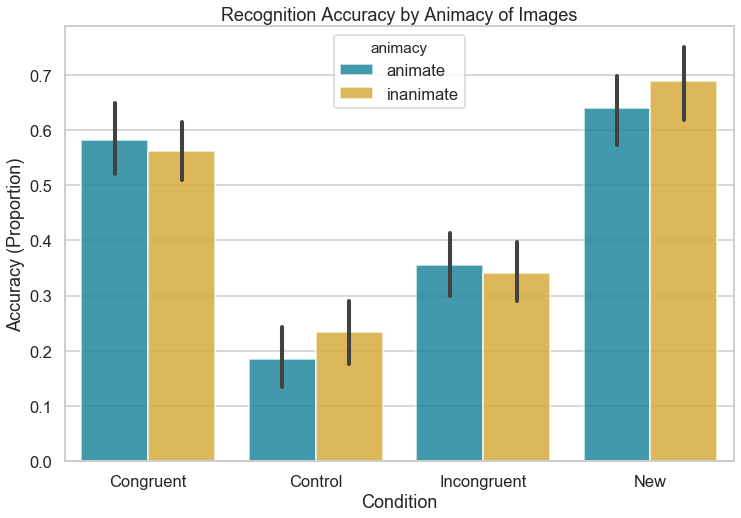

In [110]:
sns.set_context('talk')
sns.set_style('whitegrid')
animPal = ['#0C94B2','#F0B823']
fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(data = animG, x ='condition', y= 'correct', hue = 'animacy', palette = animPal, alpha = 0.85)
ax.set_title('Recognition Accuracy by Animacy of Images') 
ax.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
ax.set(ylabel = 'Accuracy (Proportion)', xlabel = 'Condition')
plt.show()

### False alarms for each condition

In [111]:
stacked_g = recog.copy() 
stacked_g['cong_resp'] = stacked_g['response'] == 'congruent'
stacked_g['ctrl_resp'] = stacked_g['response'] == 'control'
stacked_g['incong_resp'] = stacked_g['response'] == 'incongruent'
stacked_g['new_resp'] = stacked_g['response'] == 'new'

In [112]:
stacked_g = stacked_g.groupby(['condition']).mean()
stacked_g = stacked_g.reset_index()
display(stacked_g)

,condition,id,subjectGroup,RT,recognized,correct,cong_resp,ctrl_resp,incong_resp,new_resp
0,congruent,40.117647,1.955882,2349.619748,0.931723,0.571429,0.571429,0.128151,0.232143,0.068277
1,control,40.117647,1.955882,2092.431723,0.915966,0.209034,0.393908,0.209034,0.313025,0.084034
2,incongruent,40.117647,1.955882,2237.830882,0.902311,0.347689,0.386555,0.168067,0.347689,0.097689
3,new,40.117647,1.955882,1907.198529,0.664216,0.664216,0.080065,0.087418,0.168301,0.664216


In [113]:
# pal3 = ['#D58D8f']
# pal2 = ['#86837B']
# pal1 = ['#136E7D']
# pal4 = ['#EBE2CF']

pal1 = ['#0C94B2']
pal2 = ['#F0B823']
pal3 = ['#C46D6F']
pal4 = ['#C4C4CD']
edge = ['#4A4D88']

In [114]:
# Stacked Par Graph of Responses to each image type
# sns.set_context('talk')
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(figsize = (12, 8))
# bar_order = ['congruent','control', 'incongruent','new']
# sns.catplot(x ='condition', y = 'cong_resp', data = stacked_g, kind = 'bar',palette = pal1, edgecolor=edge, alpha = 0.85, order = bar_order, ax=ax, legend = True)
# sns.catplot(x ='condition', y = 'ctrl_resp', data = stacked_g, kind = 'bar', palette = pal2, edgecolor=edge, alpha = 0.85, bottom = stacked_g['cong_resp'], order = bar_order,ax=ax)
# sns.catplot(x ='condition', y = 'incong_resp', data = stacked_g, kind = 'bar', palette = pal3, edgecolor=edge, alpha = 0.85, bottom = stacked_g['cong_resp']+stacked_g['ctrl_resp'], order = bar_order,ax=ax)
# sns.catplot(x ='condition', y = 'new_resp',data = stacked_g, kind = 'bar', palette = pal4, edgecolor=edge, alpha = 0.85, bottom=stacked_g['cong_resp']+stacked_g['ctrl_resp']+stacked_g['incong_resp'], order = bar_order,ax=ax)
# ax.set(ylabel='Proportion of Responses', xlabel = 'Initial Audiovisual Context')
# ax.set_title('Proportion of Responses to Each Image Type', fontsize=20) 
# ax.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
# plt.close(2)
# plt.close(3)
# plt.close(4)
# plt.close(5)

In [115]:
melted_g = stacked_g.melt(id_vars=['id','subjectGroup','RT','condition','recognized','correct'],var_name='Response', value_name='Proportion')
melted_g['rows'] = (melted_g['condition'] == 'congruent') | (melted_g['condition'] == 'control')
melted_g

,id,subjectGroup,RT,condition,recognized,correct,Response,Proportion,rows
0,40.117647,1.955882,2349.619748,congruent,0.931723,0.571429,cong_resp,0.571429,True
1,40.117647,1.955882,2092.431723,control,0.915966,0.209034,cong_resp,0.393908,True
2,40.117647,1.955882,2237.830882,incongruent,0.902311,0.347689,cong_resp,0.386555,False
3,40.117647,1.955882,1907.198529,new,0.664216,0.664216,cong_resp,0.080065,False
4,40.117647,1.955882,2349.619748,congruent,0.931723,0.571429,ctrl_resp,0.128151,True
5,40.117647,1.955882,2092.431723,control,0.915966,0.209034,ctrl_resp,0.209034,True
6,40.117647,1.955882,2237.830882,incongruent,0.902311,0.347689,ctrl_resp,0.168067,False
7,40.117647,1.955882,1907.198529,new,0.664216,0.664216,ctrl_resp,0.087418,False
8,40.117647,1.955882,2349.619748,congruent,0.931723,0.571429,incong_resp,0.232143,True
9,40.117647,1.955882,2092.431723,control,0.915966,0.209034,incong_resp,0.313025,True


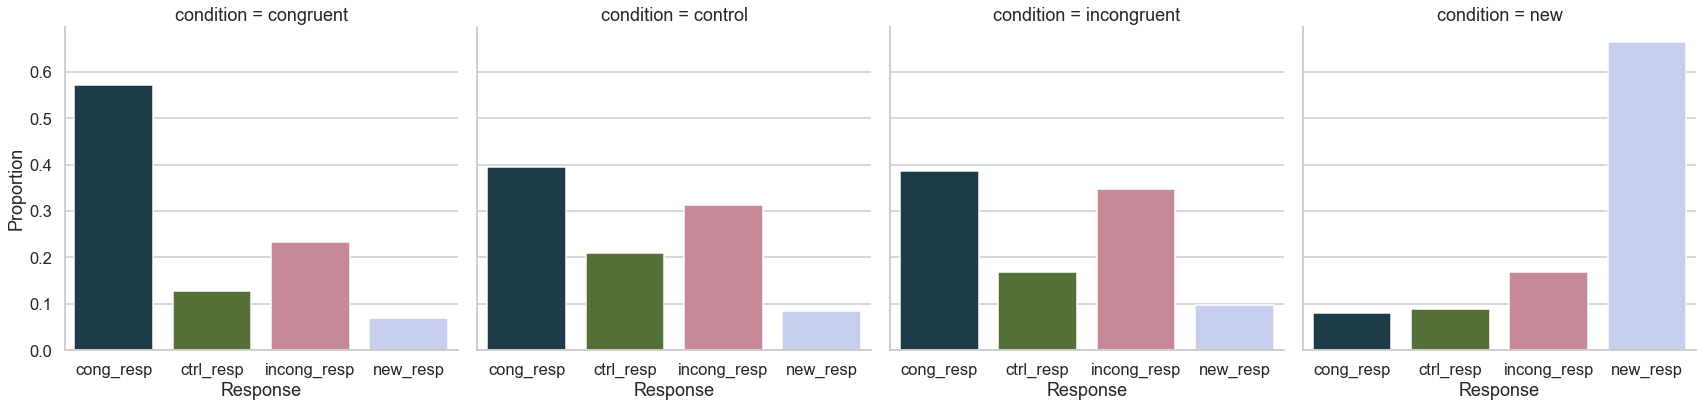

In [116]:
g = sns.FacetGrid(melted_g, col="condition",height=6, margin_titles=True)
g.map(sns.barplot, "Response", "Proportion", palette= 'cubehelix')

In [117]:
recog.head()

,id,subjectGroup,image_shown,button1,button2,button3,button4,condition,animacy,image_shown,response,RT,oldNewResp,oldNew,recognized,correct
44,0,2.0,bus,same,different,nonsense,new,new,inanimate,bus,new,3440,new,new,1,True
45,0,2.0,walkie,same,different,nonsense,new,new,inanimate,walkie,new,1714,new,new,1,True
46,0,2.0,butterfly,same,different,nonsense,new,new,animate,butterfly,new,3519,new,new,1,True
47,0,2.0,laptop,same,different,nonsense,new,new,inanimate,laptop,incongruent,2887,old,new,0,False
48,0,2.0,stapler,same,different,nonsense,new,incongruent,inanimate,stapler,congruent,2093,old,old,1,False


In [118]:
recog['new_resp'] = recog['oldNewResp'] == 'new'

In [119]:
# plot the proportion of "new" responses for each condition
oldnewG = recog.groupby(['id','new_resp','condition']).mean()
oldnewG = oldnewG.reset_index()
oldnewG

,id,new_resp,condition,subjectGroup,RT,recognized,correct
0,0,False,congruent,2.0,1189.153846,1.0,0.846154
1,0,False,control,2.0,1162.000000,1.0,0.000000
2,0,False,incongruent,2.0,1113.642857,1.0,0.071429
3,0,False,new,2.0,1553.375000,0.0,0.000000
4,0,True,congruent,2.0,1419.000000,0.0,0.000000
...,...,...,...,...,...,...,...
454,80,False,control,1.0,2221.928571,1.0,0.000000
455,80,False,incongruent,1.0,2356.928571,1.0,0.571429
456,80,False,new,1.0,2313.833333,0.0,0.000000
457,80,True,congruent,1.0,2481.000000,0.0,0.000000


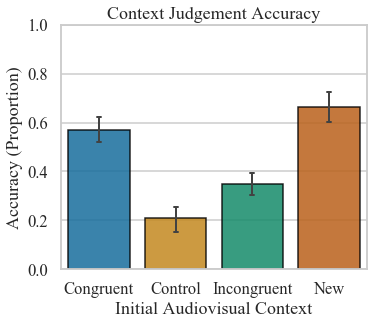

In [120]:
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})
fig, (ax1) = plt.subplots(figsize = (5.5, 4.5))
sns.barplot(data = gRecog, x ='condition', y= 'correct', palette = 'colorblind', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'],capsize = .05, edgecolor = 'black', errwidth=2, ax = ax1)
ax1.set(ylim = (0,1),ylabel='Accuracy (Proportion)', xlabel = 'Initial Audiovisual Context')
ax1.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
ax1.set_title('Context Judgement Accuracy') 
plt.show()      

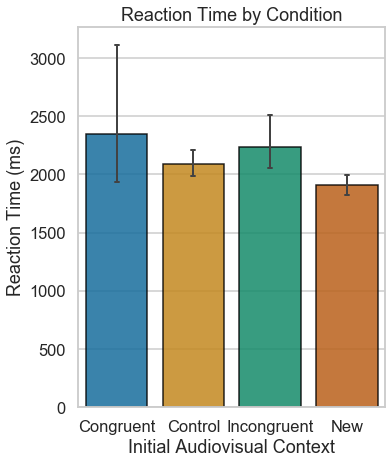

In [121]:
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set_style({'font.family': 'Times New Roman'})
fig, (ax0) = plt.subplots(figsize = (5.5, 7))
sns.barplot(data = recog, x ='condition', y= 'RT', palette = 'colorblind', alpha = 0.85, order = ['congruent', 'control', 'incongruent', 'new'],capsize = .05, edgecolor = 'black', errwidth=2, ax = ax0)
ax0.set(ylabel='Reaction Time (ms)', xlabel = 'Initial Audiovisual Context')
ax0.set_xticklabels(['Congruent', 'Control', 'Incongruent', 'New'])
ax0.set_title('Reaction Time by Condition')       
plt.show()

In [122]:
encode = encode[~encode.id.isin(sj)]
encode.id.unique(), len(encode.id.unique())

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19,
        21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 43, 44, 45, 46, 48, 49, 51, 52, 54, 55, 58, 59, 60, 61,
        62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 68)

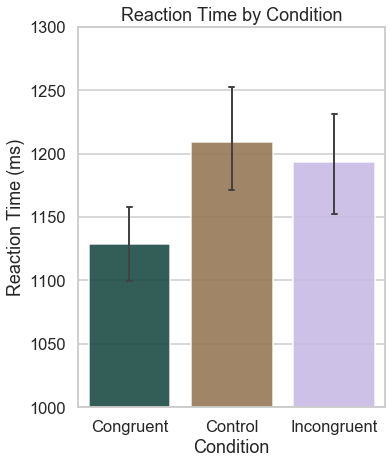

In [123]:
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set_style({'font.family': 'Times New Roman'})
fig, (ax0) = plt.subplots(figsize = (5.5, 7))
sns.barplot(data = encode, x ='condition', y= 'RT', palette = 'cubehelix', alpha = 0.9, order = ['congruent', 'control', 'incongruent'],capsize = .05, errwidth=2, ax = ax0)
ax0.set(ylabel='Reaction Time (ms)', xlabel = 'Condition', ylim = (1000,1300))
ax0.set_xticklabels(['Congruent', 'Control', 'Incongruent'])
ax0.set_title('Reaction Time by Condition')       
plt.show()

In [124]:
pg.anova(data = encode, dv = 'RT', between = 'condition', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,condition,3.462467e+06,2,1731233.38,4.92,0.00735901,0.003
1,Within,1.003844e+09,2853,351855.55,-,-,-


In [125]:
pg.pairwise_tukey(data = encode, dv = 'RT', between = 'condition')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,congruent,control,1128.743,1209.203,-80.460,27.188,two-sided,-2.959,0.008669,-0.136
1,congruent,incongruent,1128.743,1193.472,-64.729,27.188,two-sided,-2.381,0.045528,-0.109
2,control,incongruent,1209.203,1193.472,15.731,27.188,two-sided,0.579,0.855172,0.027
